# Lesson 13: Introduction to Data Analysis with NumPy, Pandas, and Matplotlib

Welcome to the third and final part of our course! We've learned Python fundamentals and the principles of distributed data processing with MapReduce. Now, we'll dive into the tools that data scientists use every day to explore, clean, analyze, and visualize data.

This lesson introduces the "Holy Trinity" of the Python data science ecosystem:
1.  **NumPy**: The fundamental package for numerical computation. It provides powerful N-dimensional array objects.
2.  **Pandas**: The ultimate tool for working with structured, tabular data. It provides the `DataFrame`, an object that will become your best friend.
3.  **Matplotlib**: The foundational library for creating static, animated, and interactive visualizations in Python.

## Part 1: NumPy (Numerical Python)

NumPy's main object is the homogeneous multidimensional array (`ndarray`). It's a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers.

### Why NumPy over Python Lists?

* **Speed**: NumPy operations are implemented in C, making them much faster than equivalent operations on Python lists, especially for large datasets. This is due to **vectorization**.
* **Memory Efficiency**: NumPy arrays take up less space in memory than Python lists for the same number of elements.
* **Convenience**: It provides a vast library of high-level mathematical functions that operate on entire arrays without the need for loops.

In [2]:
import numpy as np

### Creating NumPy Arrays

In [3]:
# From a Python list
my_list = [1, 2, 3, 4, 5]
np_array = np.array(my_list)
print(f"From a list: {np_array}")

# Create a 2D array (matrix)
my_2d_list = [[1, 2, 3], [4, 5, 6]]
np_matrix = np.array(my_2d_list)
print(f"\nA 2D matrix:\n{np_matrix}")

# Placeholder arrays
zeros_array = np.zeros((2, 3)) # (rows, columns)
ones_array = np.ones((3, 2))
print(f"\nZeros array:\n{zeros_array}")

# Arrays with ranges
range_array = np.arange(0, 10, 2) # (start, stop, step)
print(f"\nRange array: {range_array}")

# Random numbers
random_array = np.random.randint(0, 100, size=(3, 4)) # (low, high, size)
print(f"\nRandom integer array:\n{random_array}")

From a list: [1 2 3 4 5]

A 2D matrix:
[[1 2 3]
 [4 5 6]]

Zeros array:
[[0. 0. 0.]
 [0. 0. 0.]]

Range array: [0 2 4 6 8]

Random integer array:
[[85 87 70 70]
 [26 83 97 74]
 [11 58 46 77]]


### Array Attributes and Operations

In [4]:
print(f"Shape of random_array: {random_array.shape}")
print(f"Data type of random_array: {random_array.dtype}")
print(f"Number of dimensions: {random_array.ndim}")

# Vectorized Operations (element-wise, no loops needed!)
arr1 = np.array([1, 2, 3])
arr2 = np.array([10, 20, 30])
print(f"\nSum of arrays: {arr1 + arr2}")
print(f"Product of arrays: {arr1 * arr2}")

Shape of random_array: (3, 4)
Data type of random_array: int32
Number of dimensions: 2

Sum of arrays: [11 22 33]
Product of arrays: [10 40 90]


### Indexing and Slicing

In [5]:
data = np.arange(10, 20)
print(f"Original array: {data}")

# Get elements greater than 15
# This is called boolean or fancy indexing and is extremely powerful
large_elements = data[data > 15]
print(f"Elements > 15: {large_elements}")

# In a 2D array
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"\nOriginal matrix:\n{matrix}")
print(f"Element at row 1, col 2: {matrix[1, 2]}") # Prints 6
print(f"First two rows:\n{matrix[:2, :]}")

Original array: [10 11 12 13 14 15 16 17 18 19]
Elements > 15: [16 17 18 19]

Original matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Element at row 1, col 2: 6
First two rows:
[[1 2 3]
 [4 5 6]]


## Part 2: Pandas (Python Data Analysis Library)

Pandas is built on top of NumPy and is the go-to library for data manipulation and analysis. It excels at handling structured (tabular) data, like data from a spreadsheet or a database table.

### Core Data Structures: Series and DataFrame

In [6]:
import pandas as pd

# A Series is a 1D labeled array
my_series = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print(f"A Pandas Series:\n{my_series}")

# A DataFrame is a 2D labeled data structure (like a table)
data_dict = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 22],
    'City': ['New York', 'Paris', 'London']
}
df = pd.DataFrame(data_dict)
print(f"\nA Pandas DataFrame:")
df

A Pandas Series:
a    10
b    20
c    30
dtype: int64

A Pandas DataFrame:


,Name,Age,City
0,Alice,25,New York
1,Bob,30,Paris
2,Charlie,22,London


### Reading Data and Inspecting a DataFrame

The most common way to create a DataFrame is by reading a file, like a CSV.

In [7]:
# Let's create a dummy CSV file to work with
csv_data = """product_id,category,sales,rating
101,Electronics,1200,4.5
102,Clothing,800,4.8
103,Electronics,1500,4.7
104,Books,300,4.9
105,Clothing,950,4.6
106,Books,450,4.8
"""
with open('sales_data.csv', 'w') as f:
    f.write(csv_data)

# Read the CSV into a DataFrame
sales_df = pd.read_csv('sales_data.csv')

print("--- First 3 rows of the DataFrame ---")
display(sales_df.head(3))

print("\n--- Basic info about the DataFrame ---")
sales_df.info()

print("\n--- Descriptive statistics ---")
display(sales_df.describe())

--- First 3 rows of the DataFrame ---


,product_id,category,sales,rating
0,101,Electronics,1200,4.5
1,102,Clothing,800,4.8
2,103,Electronics,1500,4.7



--- Basic info about the DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  6 non-null      int64  
 1   category    6 non-null      object 
 2   sales       6 non-null      int64  
 3   rating      6 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 324.0+ bytes

--- Descriptive statistics ---


,product_id,sales,rating
count,6.000000,6.000000,6.000000
mean,103.500000,866.666667,4.716667
std,1.870829,451.294435,0.147196
min,101.000000,300.000000,4.500000
25%,102.250000,537.500000,4.625000
50%,103.500000,875.000000,4.750000
75%,104.750000,1137.500000,4.800000
max,106.000000,1500.000000,4.900000


### Data Selection, Filtering, and Grouping

In [8]:
# Select a single column (returns a Series)
categories = sales_df['category']
print(f"Categories column:\n{categories.head(3)}")

# Filter rows based on a condition
high_sales = sales_df[sales_df['sales'] > 1000]
print(f"\n--- Products with sales > 1000 ---")
display(high_sales)

# Grouping and Aggregation (very similar to MapReduce!)
# Let's find the average sales per category
avg_sales_by_category = sales_df.groupby('category')['sales'].mean()
print(f"\n--- Average sales by category ---")
display(avg_sales_by_category)

Categories column:
0    Electronics
1       Clothing
2    Electronics
Name: category, dtype: object

--- Products with sales > 1000 ---


,product_id,category,sales,rating
0,101,Electronics,1200,4.5
2,103,Electronics,1500,4.7



--- Average sales by category ---


category
Books           375.0
Clothing        875.0
Electronics    1350.0
Name: sales, dtype: float64

## Part 3: Matplotlib (The Plotting Library)

Matplotlib is the most widely used library for creating plots and data visualizations. Its interface can be a bit complex, but it's incredibly powerful.

In [9]:
import matplotlib.pyplot as plt

# This is a common setting for Jupyter to display plots inline
%matplotlib inline

### Basic Plotting

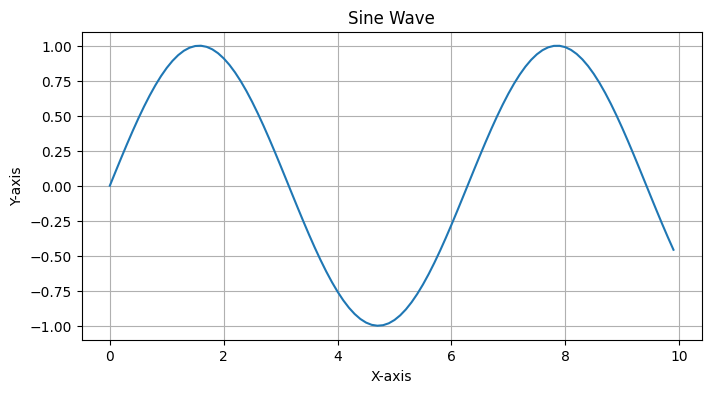

In [10]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)

plt.figure(figsize=(8, 4)) # Create a figure with a specific size
plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show() # Display the plot

### Plotting with Pandas

Pandas has convenient built-in plotting functions that use Matplotlib behind the scenes.

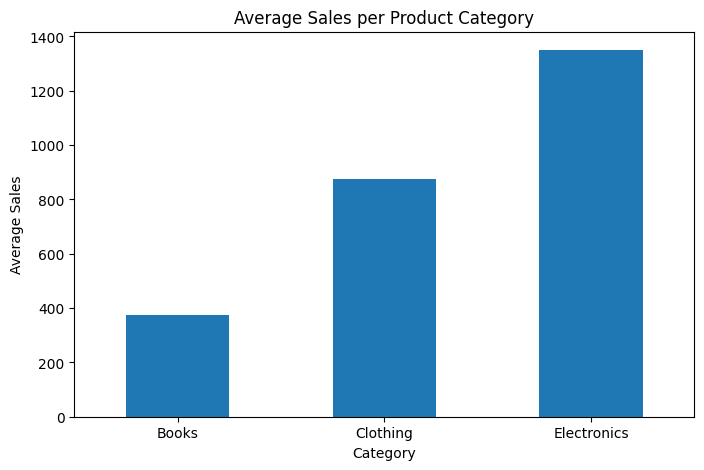

In [11]:
# Let's visualize the average sales by category we calculated earlier

avg_sales_by_category.plot(kind='bar', figsize=(8, 5))

plt.title('Average Sales per Product Category')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=0) # Keep the x-axis labels horizontal
plt.show()

## Part 4: Practical Project - Visualizing Our MapReduce Results

Now, let's apply our new skills to visualize the results from our previous lessons.

### Task 1: Visualize Word Count Results

Your task is to create a horizontal bar chart showing the top 10 most frequent words from our `word_count` MapReduce job.

In [ ]:
import json

# 1. Load the JSON data
# Note: The path might differ based on where you run this notebook.
word_count_results_path = '../11 - MapReduce Implementation Lesson/output/word_count_results/results.json'
with open(word_count_results_path, 'r') as f:
    word_count_data = json.load(f)

# 2. Convert to a Pandas DataFrame
word_df = pd.DataFrame(word_count_data)
word_df.columns = ['word', 'count']

# 3. Sort by count and get the top 10
top_10_words = word_df.sort_values(by='count', ascending=False).head(10)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_10_words['word'], top_10_words['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 10 Most Frequent Words')
plt.gca().invert_yaxis() # Display the highest count at the top
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../11 - MapReduce Implementation Lesson/results.json'

### Task 2: Visualize Exam Problem Results

Your task is to create a bar chart showing the number of available friends for each successful time slot from the exam problem.

In [ ]:
# 1. Load the JSON data
exam_results_path = 'output/exam_results/results.json'
with open(exam_results_path, 'r') as f:
    exam_data = json.load(f)

# 2. Parse and flatten the data into a list of dictionaries
parsed_data = []
for item in exam_data:
    day, hour = item['key']
    friend_count, friends_list = item['value']
    parsed_data.append({
        'day': day,
        'hour': hour,
        'friend_count': friend_count
    })

# 3. Convert to a DataFrame and create a readable label for the x-axis
exam_df = pd.DataFrame(parsed_data)
exam_df['time_slot'] = exam_df['day'].astype(str) + ' ' + exam_df['hour'].astype(str) + ':00'

# 4. Sort the DataFrame by friend count
exam_df = exam_df.sort_values(by='friend_count', ascending=False)

# 5. Plot the results
plt.figure(figsize=(10, 6))
plt.bar(exam_df['time_slot'], exam_df['friend_count'], color='salmon')
plt.xlabel('Available Time Slot')
plt.ylabel('Number of Available Friends')
plt.title('Friend Availability for Gaming Room Slots')
plt.xticks(rotation=45)
plt.show()